
Giá trị gần tối ưu: a = 1.0006561062906125, b = 2.0127678862987515


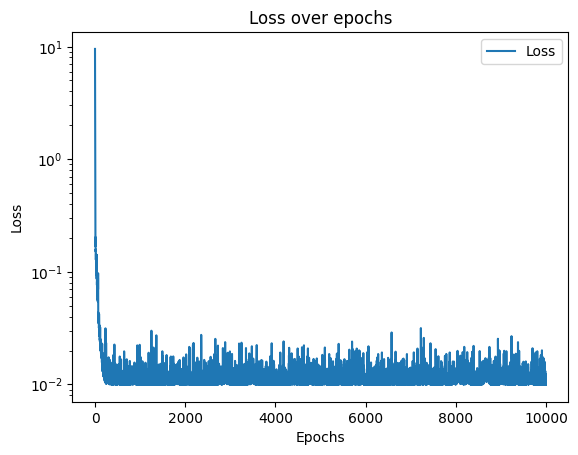

In [70]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

def TwoXplus1_data(sample_size):
    x = np.random.rand(sample_size, 1)
    y = 2 * x + 1 + np.random.randn(sample_size, 1) * 0.1
    return x, y

def compute_gradient(x, y, a, b):
    grad_a = -2 * (y - (a + b * x))
    grad_b = -2 * x * (y - (a + b * x))
    return grad_a, grad_b

def stochastic_gradient_descent(x, y, learning_rate, x_t, max_iterations, tol):
    x_t1= x_t
    loss = []
    m = len(x)
    for epoch in range(max_iterations):
        idx = random.randint(0, m - 1)
        grad_a, grad_b = compute_gradient(x[idx], y[idx], x_t[0], x_t[1])
        x_t1[0] = x_t[0] - learning_rate * grad_a
        x_t1[1] = x_t[1] - learning_rate * grad_b
        loss.append(np.sum((y - (x_t[0] + x_t[1] * x))**2) / m)
        if np.linalg.norm([grad_a, grad_b]) < tol:
            return x_t1, loss
        x_t = x_t1
        epoch += 1

    return x_t1, loss

x, y = TwoXplus1_data(1000)
result, loss = stochastic_gradient_descent(x, y, learning_rate=0.1, x_t=[5, 2], max_iterations=10000, tol=1e-6)
print(f"\nGiá trị gần tối ưu: a = {result[0].item()}, b = {result[1].item()}")

# Vẽ đồ thị hàm loss
plt.plot(loss, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.yscale('log')
plt.legend()
plt.show()

In [71]:
df = pd.read_csv('Salary_Data.csv')
display(df)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [72]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
df[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])
display(df)

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514
5,0.191489,0.223376
6,0.202128,0.264812
7,0.223404,0.197425
8,0.223404,0.315545
9,0.276596,0.229837


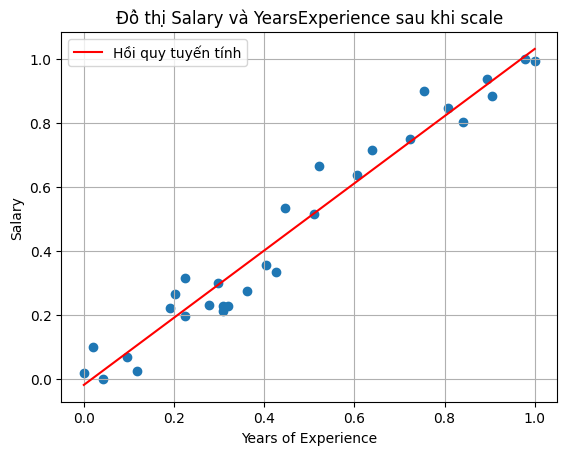

In [73]:
X = df[["YearsExperience"]]
y = df["Salary"]

# Hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Đồ thị Salary và YearsExperience sau khi scale')
x = np.linspace(X.min(), y.max(), 100).reshape(-1, 1)
y = model.predict(x)
plt.plot(x, y, color='red', label='Hồi quy tuyến tính')
plt.legend()
plt.grid()
plt.show()

Phương trình hồi quy: y = -0.038 + 1.054 * x
Giá trị dự đoán: [-0.03777084 -0.01533591  0.00709903  0.06318637  0.0856213 ]
Giá trị thật: [0.01904087 0.1000945  0.         0.06843846 0.02551382]
Sai số dự đoán:
MAE: 0.05540611966288822
MSE: 0.0046615044847340085


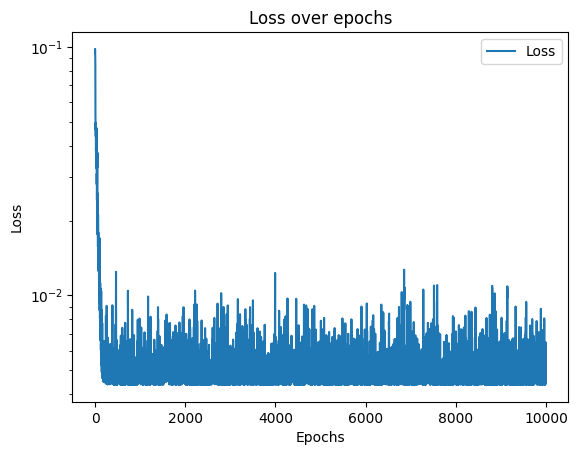

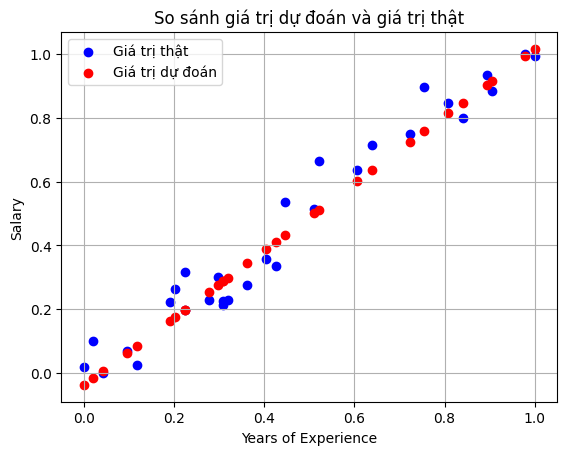

In [74]:
result, loss = stochastic_gradient_descent(df['YearsExperience'].values, df['Salary'].values, learning_rate=0.1, x_t=[0, 0], max_iterations=10000, tol=1e-6)
print(f"Phương trình hồi quy: y = {result[0]:.3f} + {result[1]:.3f} * x")

# In ra giá trị dự đoán
predicted_salary = result[0] + result[1] * df['YearsExperience'].values
print(f"Giá trị dự đoán: {predicted_salary[:5]}")
print(f"Giá trị thật: {df['Salary'].values[:5]}")

# Sai số dự đoán
mae = mean_absolute_error(df['Salary'].values, predicted_salary)
print("Sai số dự đoán:")
print(f"MAE: {mae}")
mse = mean_squared_error(df['Salary'].values, predicted_salary)
print(f"MSE: {mse}")

# Vẽ đồ thị hàm loss
plt.plot(loss, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.yscale('log')
plt.legend()
plt.show()

# Vẽ đồ thị so sánh giá trị dự đoán và giá trị thật
plt.scatter(df['YearsExperience'], df['Salary'], label='Giá trị thật', color='blue')
plt.scatter(df['YearsExperience'], predicted_salary, label='Giá trị dự đoán', color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('So sánh giá trị dự đoán và giá trị thật')
plt.legend()
plt.grid()
plt.show()

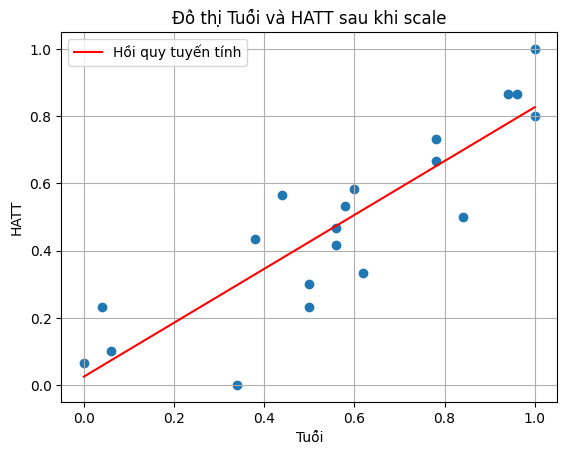

In [75]:
df1 = pd.read_csv('tuoi_hatt.csv')
scaler = MinMaxScaler()
df1[['Tuổi', 'HATT']] = scaler.fit_transform(df1[['Tuổi', 'HATT']])
X = df1[['Tuổi']]
y = df1["HATT"]

# Hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

plt.scatter(df1['Tuổi'], df1['HATT'])
plt.xlabel('Tuổi')
plt.ylabel('HATT')
plt.title('Đồ thị Tuổi và HATT sau khi scale')
x = np.linspace(X.min(), y.max(), 100).reshape(-1, 1)
y = model.predict(x)
plt.plot(x, y, color='red', label='Hồi quy tuyến tính')
plt.legend()
plt.grid()
plt.show()

Phương trình hồi quy: y = 0.000 + 0.7814 * x
Giá trị dự đoán: [0.34417271 0.29728992 0.4379383  0.46919349 0.75049025]
Giá trị thật: [0.56666667 0.43333333 0.46666667 0.58333333 0.86666667]
Sai số dự đoán:
MAE: 0.12055202899834341
MSE: 0.019265810623049762


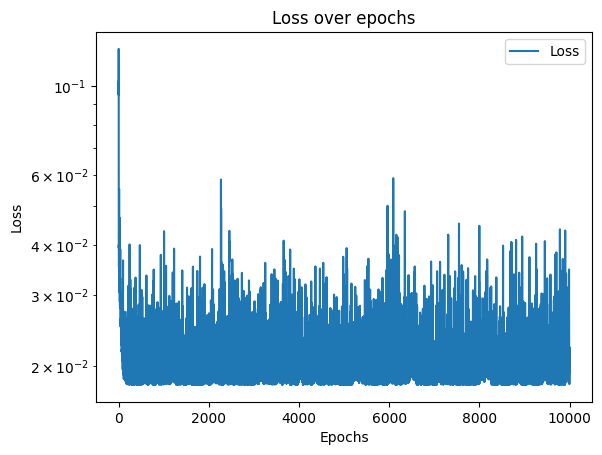

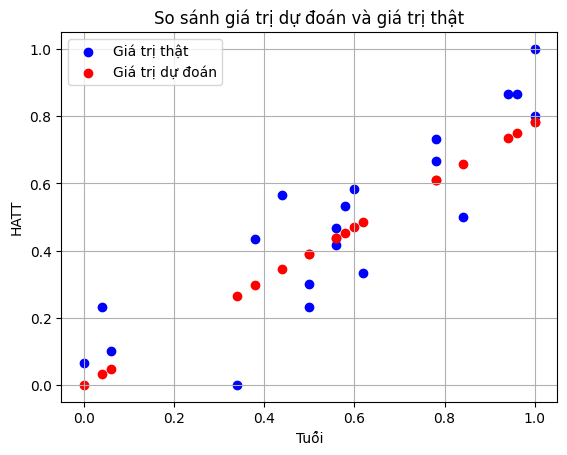

In [76]:
result, loss = stochastic_gradient_descent(df1['Tuổi'].values, df1['HATT'].values, learning_rate=0.1, x_t=[0, 0], max_iterations=10000, tol=1e-6)
print(f"Phương trình hồi quy: y = {result[0]:.3f} + {result[1]:.4f} * x")

# In ra giá trị dự đoán
predicted_hatt = result[0] + result[1] * df1['Tuổi'].values
print(f"Giá trị dự đoán: {predicted_hatt[:5]}")
print(f"Giá trị thật: {df1['HATT'].values[:5]}")

# Sai số dự đoán
mae = mean_absolute_error(df1['HATT'].values, predicted_hatt)
print("Sai số dự đoán:")
print(f"MAE: {mae}")
mse = mean_squared_error(df1['HATT'].values, predicted_hatt)
print(f"MSE: {mse}")

# Vẽ đồ thị hàm loss
plt.plot(loss, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.yscale('log')
plt.legend()
plt.show()

# Vẽ đồ thị so sánh giá trị dự đoán và giá trị thật
plt.scatter(df1['Tuổi'], df1['HATT'], label='Giá trị thật', color='blue')
plt.scatter(df1['Tuổi'], predicted_hatt, label='Giá trị dự đoán', color='red')
plt.xlabel('Tuổi')
plt.ylabel('HATT')
plt.title('So sánh giá trị dự đoán và giá trị thật')
plt.legend()
plt.grid()
plt.show()

# Accelerated Gradient Descent


Giá trị gần tối ưu: x = [-3.00000012 -2.00000064]
Giá trị cực tiểu: 0.0000
Số bước lặp: 5604


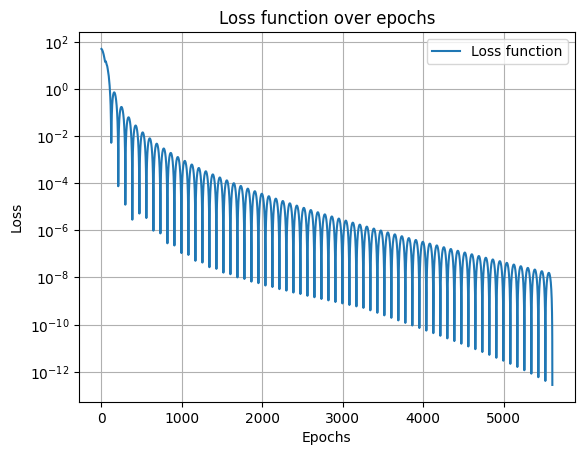

In [77]:
def f(x, y):
    return (x**2 + y - 7)**2 + (x - y + 1)**2

def gradient(x, y):
    grad_x = 4 * x * (x**2 + y - 7) + 2 * (x - y + 1)
    grad_y = 2 * (x**2 + y - 7) - 2 * (x - y + 1)
    return np.array([grad_x, grad_y])

def accelerated_gradient_descent(f, learning_rate, x_t, max_iterations, tol):
    current_point = np.array(x_t, dtype=float)
    previous_point = np.array(x_t, dtype=float)
    loss = []
    i = 0
    while i <= max_iterations - 1:
        y_i = current_point + (i - 1) / (i + 2) * (current_point - previous_point)
        grad = gradient(y_i[0], y_i[1])
        next_point = y_i - learning_rate * grad
        current_loss = f(next_point[0], next_point[1])
        loss.append(current_loss)
        if np.linalg.norm(grad) < tol:
            return next_point, f(next_point[0], next_point[1]), loss, i

        previous_point = current_point
        current_point = next_point
        i += 1

    return next_point, f(next_point[0], next_point[1]), loss, i

x, gia_tri_cuc_tieu, loss, so_buoc_lap = accelerated_gradient_descent(f, learning_rate=0.001, x_t=[0, 0], max_iterations=10000, tol=1e-6)
print(f"\nGiá trị gần tối ưu: x = {x}")
print(f"Giá trị cực tiểu: {gia_tri_cuc_tieu:.4f}")
print(f"Số bước lặp: {so_buoc_lap}")

# Vẽ đồ thị hàm mất mát
plt.plot(loss, label='Loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss function over epochs')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()



Giá trị gần tối ưu: x = [3.41361339e-07 3.22906944e-03]
Giá trị cực tiểu: 0.0000
Số bước lặp: 1912


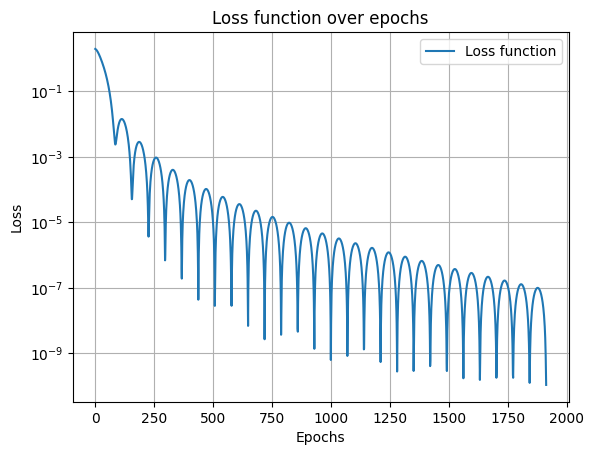

In [78]:
# Bài 6 a:
def f(x, y):
    return x**2 + y**4

def gradient(x, y):
    grad_x = 2 * x
    grad_y = 4 * y**3
    return np.array([grad_x, grad_y])

# Gọi hàm chính
x, gia_tri_cuc_tieu, loss, so_buoc_lap = accelerated_gradient_descent(f, learning_rate=0.001, x_t=[1, 1], max_iterations=10000, tol=1e-6)
print(f"\nGiá trị gần tối ưu: x = {x}")
print(f"Giá trị cực tiểu: {gia_tri_cuc_tieu:.4f}")
print(f"Số bước lặp: {so_buoc_lap}")

# Vẽ đồ thị hàm mất mát
plt.plot(loss, label='Loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss function over epochs')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
# Bài 6 b:
df2 = pd.DataFrame(columns=['Learning Rate', 'Đạo hàm', 'Số bước lặp'])
for learning_rate in np.arange(0.1, 1, 0.1):
    result = accelerated_gradient_descent(
        f=f,
        learning_rate=learning_rate,
        x_t=[1, 1],
        max_iterations=10000,
        tol=1e-6
    )
    if isinstance(result, tuple):
        x, gia_tri_cuc_tieu, loss, so_buoc_lap = result
        df2.loc[len(df2)] = {
            'Learning Rate': learning_rate,
            'Đạo hàm': gia_tri_cuc_tieu,
            'Số bước lặp': so_buoc_lap
        }
    else:
        print(f"Gradient descent failed for learning rate {learning_rate}: {result}")

display(df2)

,Learning Rate,Đạo hàm,Số bước lặp
0,0.1,1.564155e-09,186
1,0.2,1.506828e-09,112
2,0.3,1.546647e-09,95
3,0.4,1.534594e-09,128
4,0.5,NaN,10000
5,0.6,NaN,10000
6,0.7,NaN,10000
7,0.8,NaN,10000
8,0.9,NaN,10000


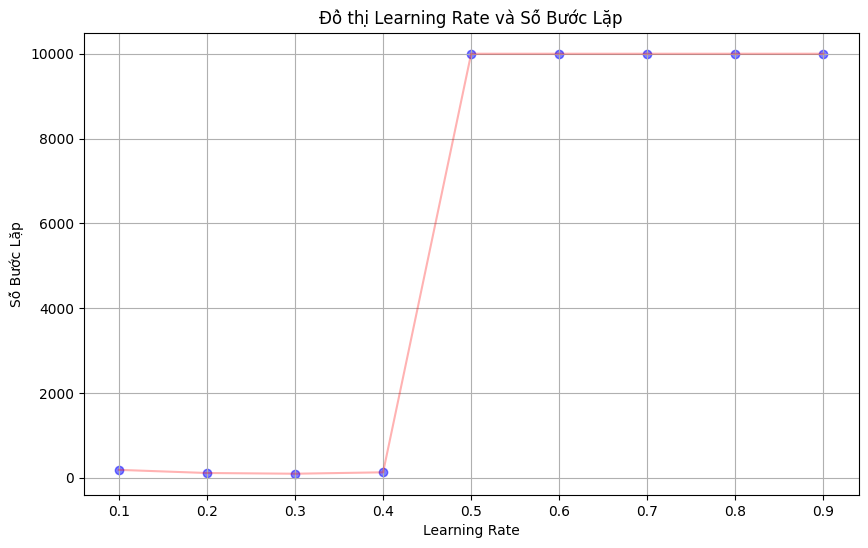

In [80]:
# Vẽ đồ thị gồm learning rate và số bước lặp

plt.figure(figsize=(10, 6))
plt.title('Đồ thị Learning Rate và Số Bước Lặp')
plt.xlabel('Learning Rate')
plt.ylabel('Số Bước Lặp')
plt.grid()
plt.scatter(df2['Learning Rate'], df2['Số bước lặp'], color='blue', alpha=0.5)
plt.plot(df2['Learning Rate'], df2['Số bước lặp'], color='red', alpha=0.3)
plt.show()

In [81]:
# Bài 6 c:
df3 = pd.DataFrame(columns=['Điểm bắt đầu', 'Đạo hàm', 'Số bước lặp'])
for start_x in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]:
    x_t = [start_x, start_x]  # Create a valid starting point with two elements
    result = accelerated_gradient_descent(
        f=f,
        learning_rate=0.1,
        x_t=x_t,
        max_iterations=10000,
        tol=1e-6
    )
    if isinstance(result, tuple):
        x, gia_tri_cuc_tieu, loss, so_buoc_lap = result
        df3.loc[len(df3)] = {
            'Điểm bắt đầu': x_t,
            'Đạo hàm': gia_tri_cuc_tieu,
            'Số bước lặp': so_buoc_lap
        }
    else:
        print(f"Gradient descent failed for điểm bắt đầu {x_t}: {result}")

display(df3)

,Điểm bắt đầu,Đạo hàm,Số bước lặp
0,"[0.1, 0.1]",1.526438e-09,184
1,"[0.2, 0.2]",1.542509e-09,149
2,"[0.3, 0.3]",1.574520e-09,142
3,"[0.4, 0.4]",1.545485e-09,147
4,"[0.5, 0.5]",1.544547e-09,157
5,"[0.6, 0.6]",1.565239e-09,168
6,"[0.7, 0.7]",1.568757e-09,178
7,"[0.8, 0.8]",1.564013e-09,185
8,"[0.9, 0.9]",1.557705e-09,188
9,"[1.0, 1.0]",1.564155e-09,186


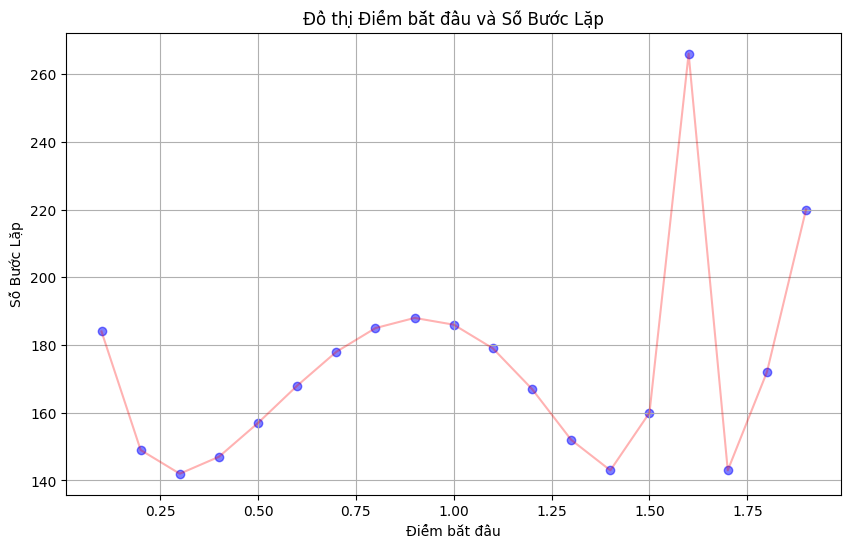

In [82]:
# Vẽ đồ thị gồm điểm bắt đầu và số bước lặp

plt.figure(figsize=(10, 6))
plt.title('Đồ thị Điểm bắt đầu và Số Bước Lặp')
plt.xlabel('Điểm bắt đầu')
plt.ylabel('Số Bước Lặp')
plt.grid()

starting_points = [point[0] for point in df3['Điểm bắt đầu']]

plt.scatter(starting_points, df3['Số bước lặp'], color='blue', alpha=0.5)
plt.plot(starting_points, df3['Số bước lặp'], color='red', alpha=0.3)
plt.show()